# Look at data

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal



fs = 20e6

In [10]:
fd = h5py.File("./proc/20220505_202734.h5", "r")

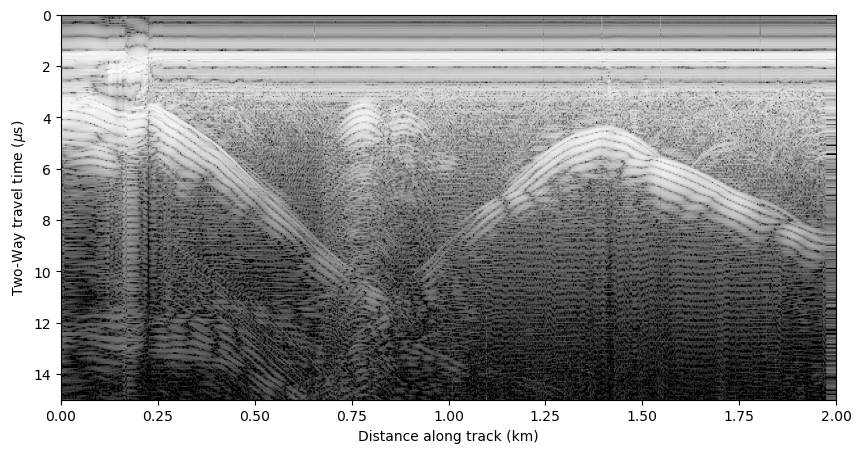

In [22]:
rx0 = fd["/raw/rx0"][:]

## Band pass filter ##
sos = signal.butter(4, [1e6, 9.5e6], btype="band", fs=fs, output="sos")
rx0 = signal.sosfiltfilt(sos, rx0, axis=0)

img = np.log(np.abs(rx0[:,:1700]))

plt.figure(figsize=(10,5))
dt = 1.0/fs
plt.imshow(img[:300,:1190], aspect="auto", cmap="Greys_r", vmin=np.percentile(img, 10), extent=[0,2,300*dt*1e6,0])
plt.xlabel("Distance along track (km)")
plt.ylabel("Two-Way travel time ($\mu$s)")
plt.savefig("20220505_202734.png")

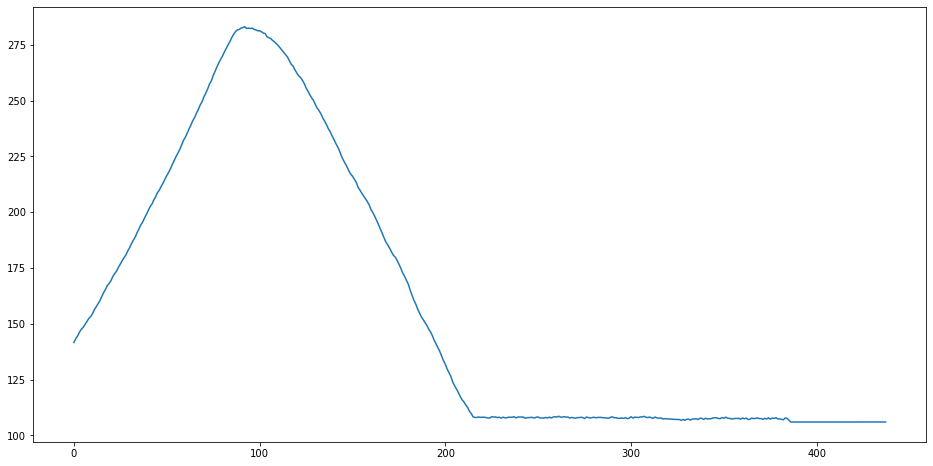

In [18]:
plt.figure(figsize=(16,8))
plt.plot(fd["/raw/sep"])

In [19]:
rxFix = fd["/raw/rxFix0"]
txFix = fd["/raw/txFix0"]

plt.plot(rxFix["lon"][950], rxFix["lat"][950], '.')
plt.plot(txFix["lon"][950], txFix["lat"][950], '.')

IndexError: index 950 is out of bounds for axis 0 with size 438

## dt = 1/fs

t0 = -32*dt
t1 = (512-32)*dt

d0 = 1.7e8*t0/2
d1 = 1.7e8*t1/2

img = np.log(np.abs(rx0))
#img = rx0
plt.figure(figsize=(16, 12))
#plt.imshow(img, aspect="auto", vmin=-10, vmax=10)
plt.imshow(img, aspect="auto", vmin=np.percentile(img, 20), vmax=np.percentile(img, 95),extent=[0, rx0.shape[1], d1, d0])
#plt.hlines([850], 0, rx0.shape[1], "r")
print(500*2/300)
#plt.xlim(100,200)

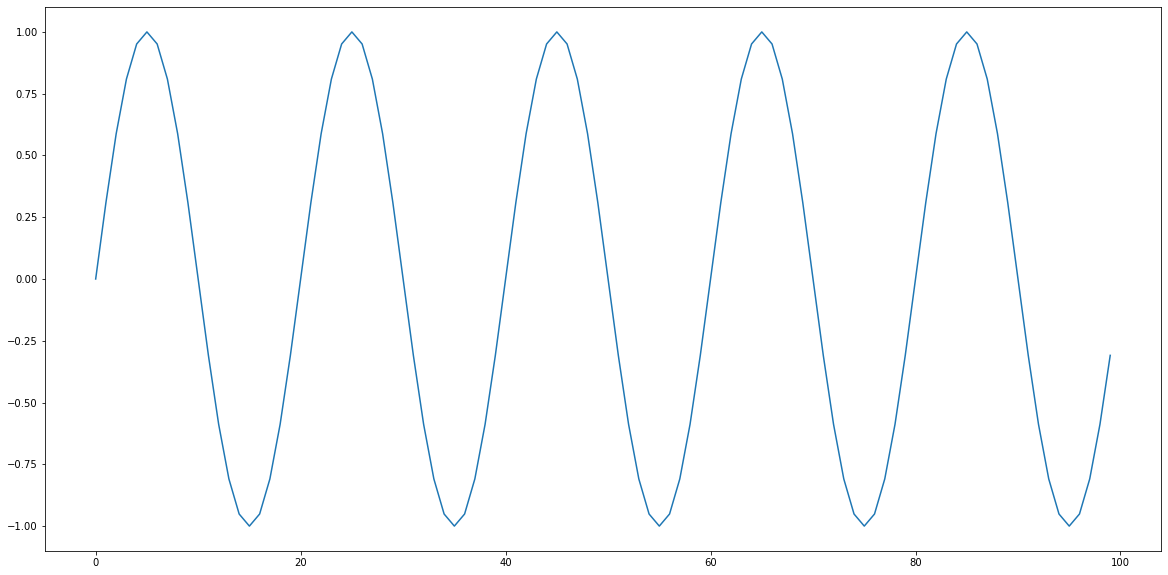

In [15]:
t = np.arange(100)
a = np.sin(2*np.pi*.05*t)

plt.figure(figsize=(20,10))
plt.plot(a)

In [23]:
105/300

0.35

# Antenna separation

In [ ]:
z = np.sqrt()